In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image

sns.set_style('darkgrid')

We'll create a dataframe that contains the path to each picture and its corresponding label (fire or non fire) and shuffle the data
.

In [10]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Creating an empty DataFrame
df = pd.DataFrame(columns=['path', 'label'])

# Looping over fire images and label them 1
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fire_dataset/fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']], columns=['path','label']))

# Looping over non-fire images and label them 0
for dirname, _, filenames in os.walk('/content/drive/MyDrive/fire_dataset/non_fire_images'):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']], columns=['path','label']))

# Shuffling the dataset to redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-10-61d0a5fd6965>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-10-61d0a5fd6965>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-10-61d0a5fd6965>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-10-61d0a5fd6965>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-10-61d0a5fd6965>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-10-61d0a5fd6965>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

path     label
0  /content/drive/MyDrive/fire_dataset/fire_image...      fire
1  /content/drive/MyDrive/fire_dataset/fire_image...      fire
2  /content/drive/MyDrive/fire_dataset/non_fire_i...  non_fire
3  /content/drive/MyDrive/fire_dataset/fire_image...      fire
4  /content/drive/MyDrive/fire_dataset/fire_image...      fire
5  /content/drive/MyDrive/fire_dataset/fire_image...      fire
6  /content/drive/MyDrive/fire_dataset/fire_image...      fire
7  /content/drive/MyDrive/fire_dataset/fire_image...      fire
8  /content/drive/MyDrive/fire_dataset/non_fire_i...  non_fire
9  /content/drive/MyDrive/fire_dataset/fire_image...      fire

The following chart shows how the data is shuffled and distributed in the dataframe we created.

In [11]:
fig = px.scatter(data_frame = df,x=df.index,y='label',color='label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2)

Now We'll visualise the data using countplot

In [12]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])


fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['darkorange','green'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(
     values=df['label'].value_counts().to_numpy(),
     labels=df['label'].value_counts().index,
    marker=dict(colors=['darkorange','green'])),
    row=1, col=2)

non_fire label contains less number of images.

Visualing the images with fire

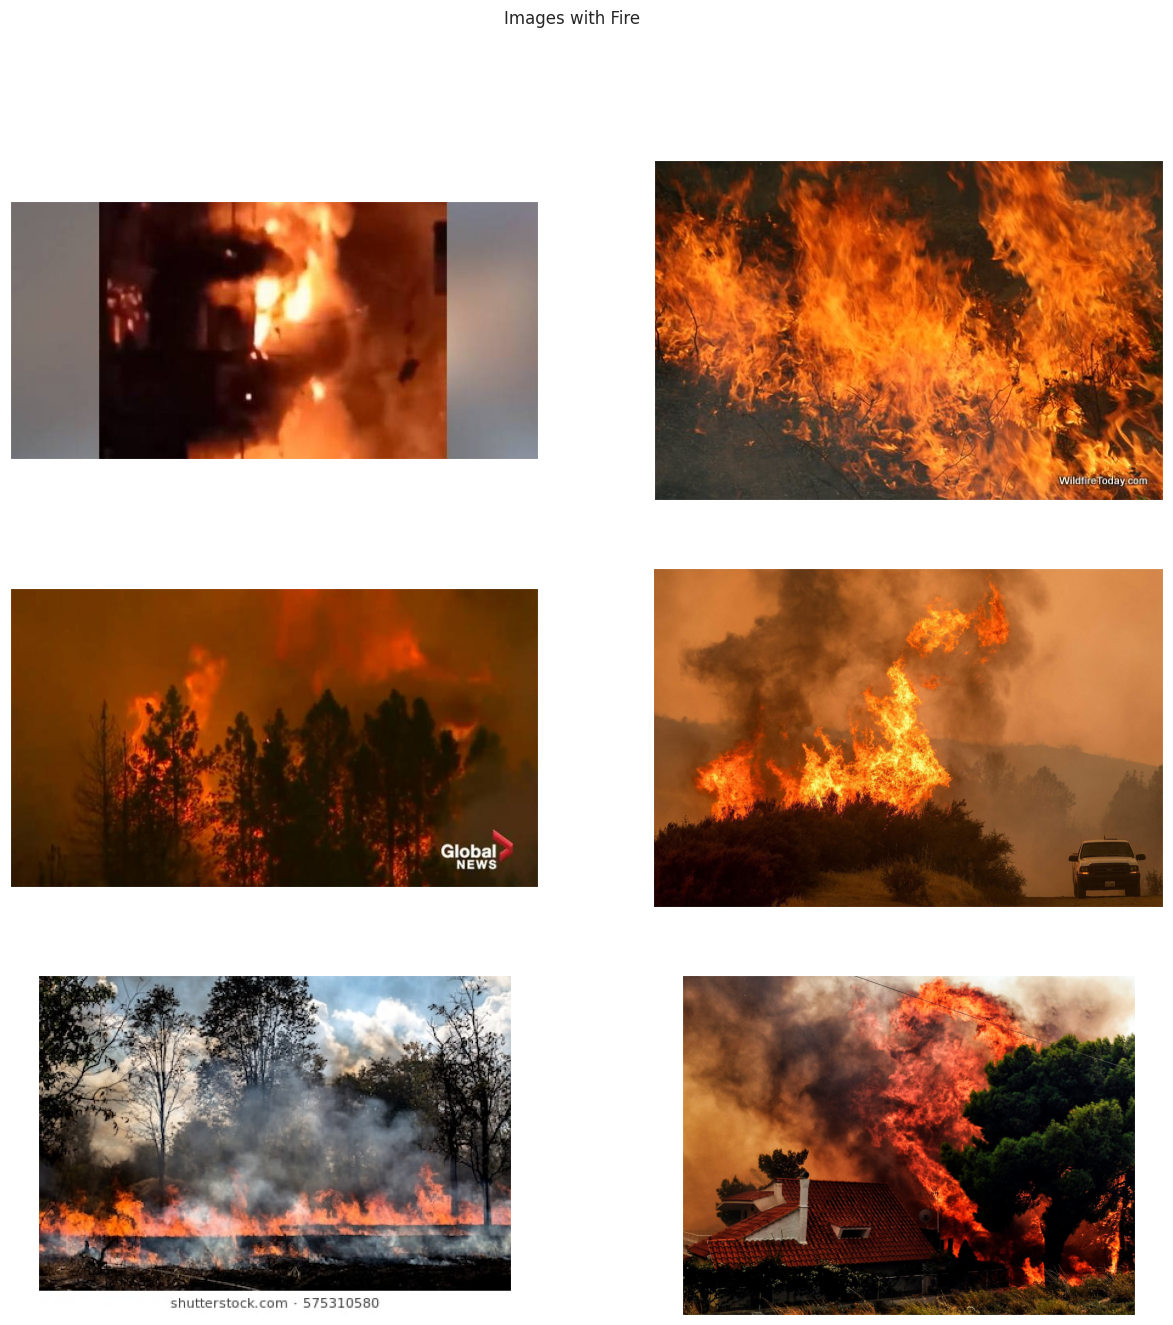

In [13]:
label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

Visualising non_fire images

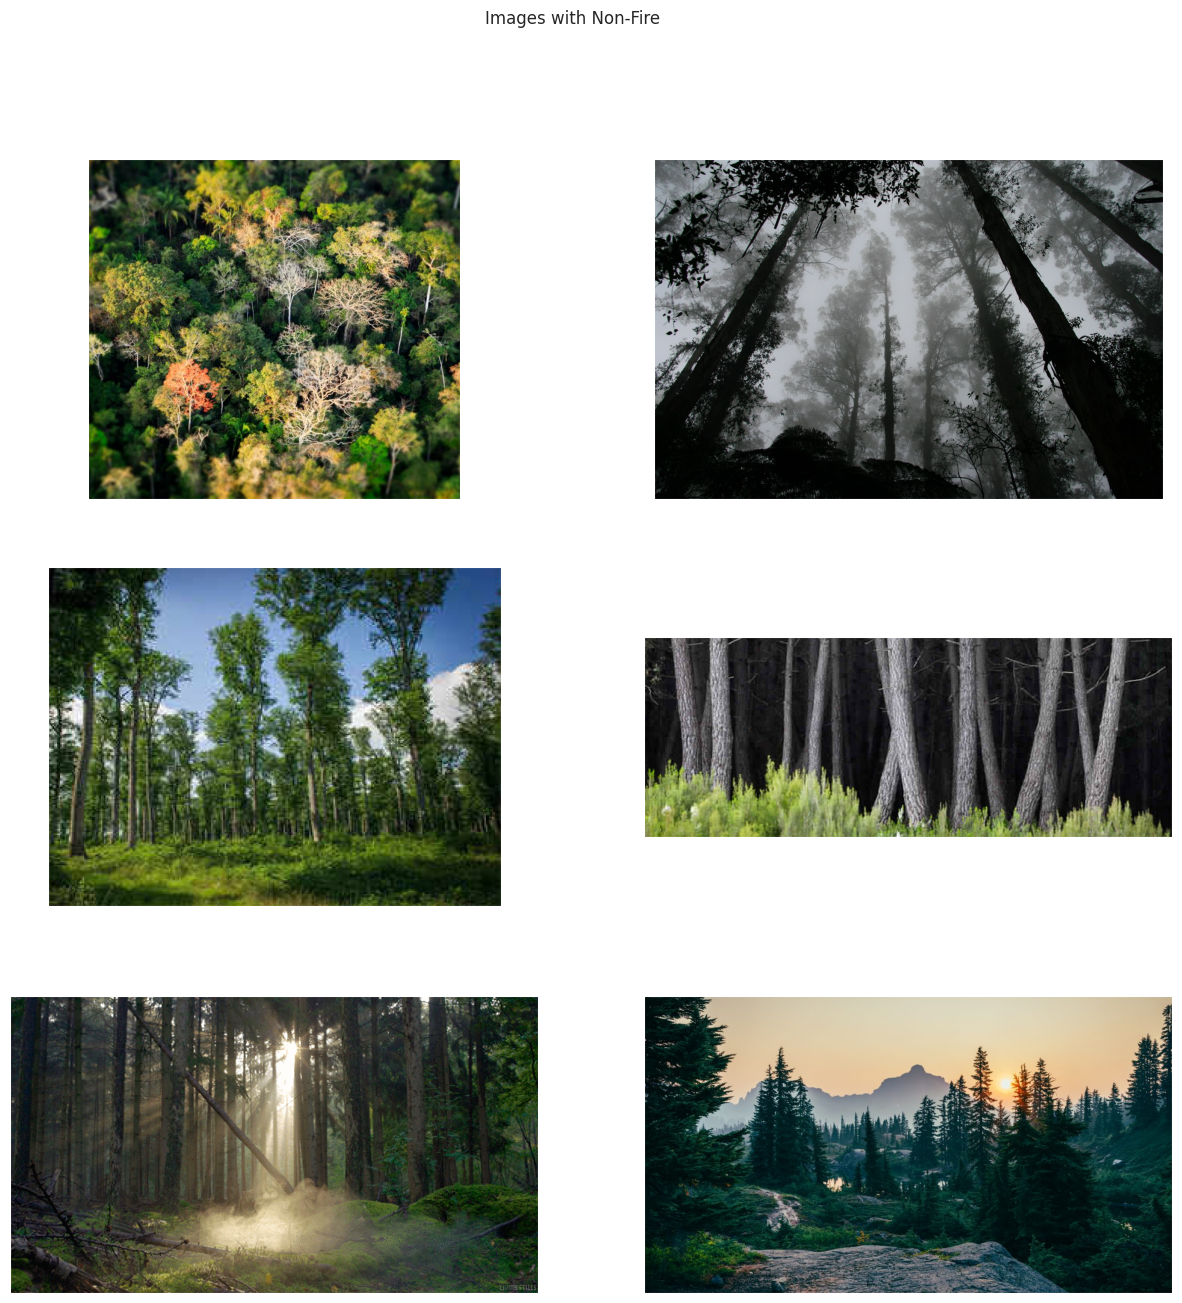

In [14]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Non-Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

By visualising the images, it is observed that shape of both 'fire' and 'non_fire' images are different


So we'll now see the distribution of shapes of images

In [16]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

path     label  height  width
0  /content/drive/MyDrive/fire_dataset/fire_image...      fire     319   1022
1  /content/drive/MyDrive/fire_dataset/fire_image...      fire     425    640
2  /content/drive/MyDrive/fire_dataset/non_fire_i...  non_fire     493    838
3  /content/drive/MyDrive/fire_dataset/fire_image...      fire     572    770
4  /content/drive/MyDrive/fire_dataset/fire_image...      fire     180    300

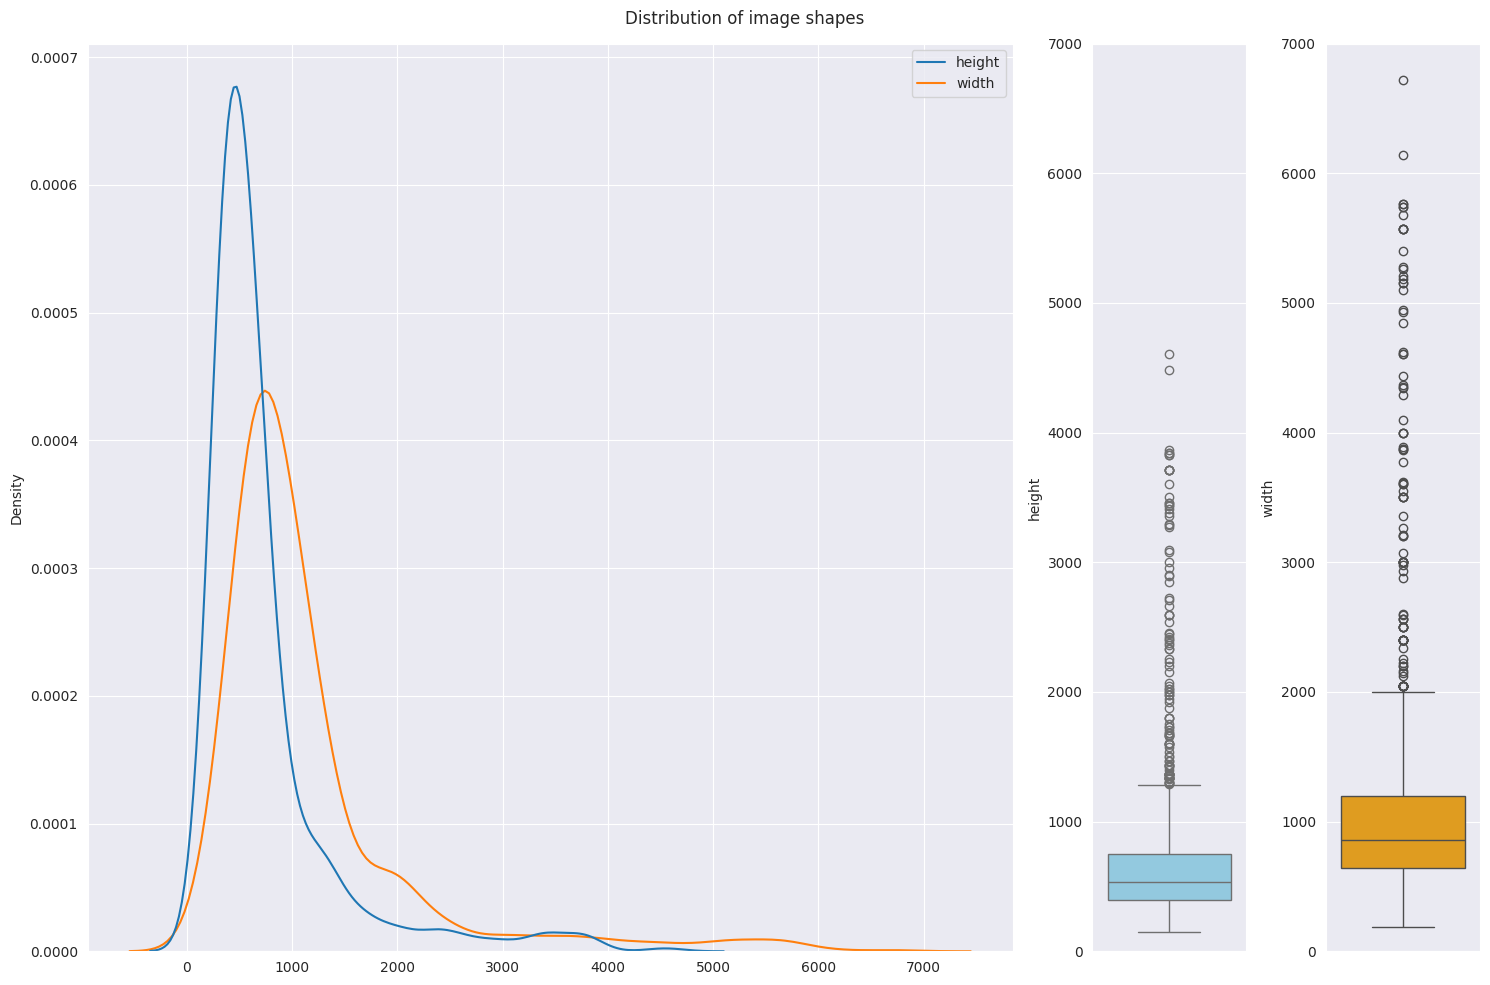

In [17]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

The images have considerable variability in both height and width. It is essential to standardize their dimensions to a fixed shape prior to the training process.

**Image Augmentation using ImageDataGenerator**

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.2,
)

Creating the Training and Testing generator

We'll use the flow_from_dataframe method of the ImageDataGenerator class which will take the Pandas DataFrame and the path to a directory along with labels and generate batches of augmented/normalized images.

We'll construct two generators, one for training and the other for validation.

The labels 'fire' and 'non_fire' will be automatically encoded to integer by ImageDataGenerator

In [20]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')

Found 800 validated image filenames belonging to 2 classes.
Found 199 validated image filenames belonging to 2 classes.


Let's see class indices assigned by ImageDataGenerator

i.e. labels encoded to integer

In [21]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key

print(class_indices)

{0: 'fire', 1: 'non_fire'}


Now let's visualise the images generated in training set

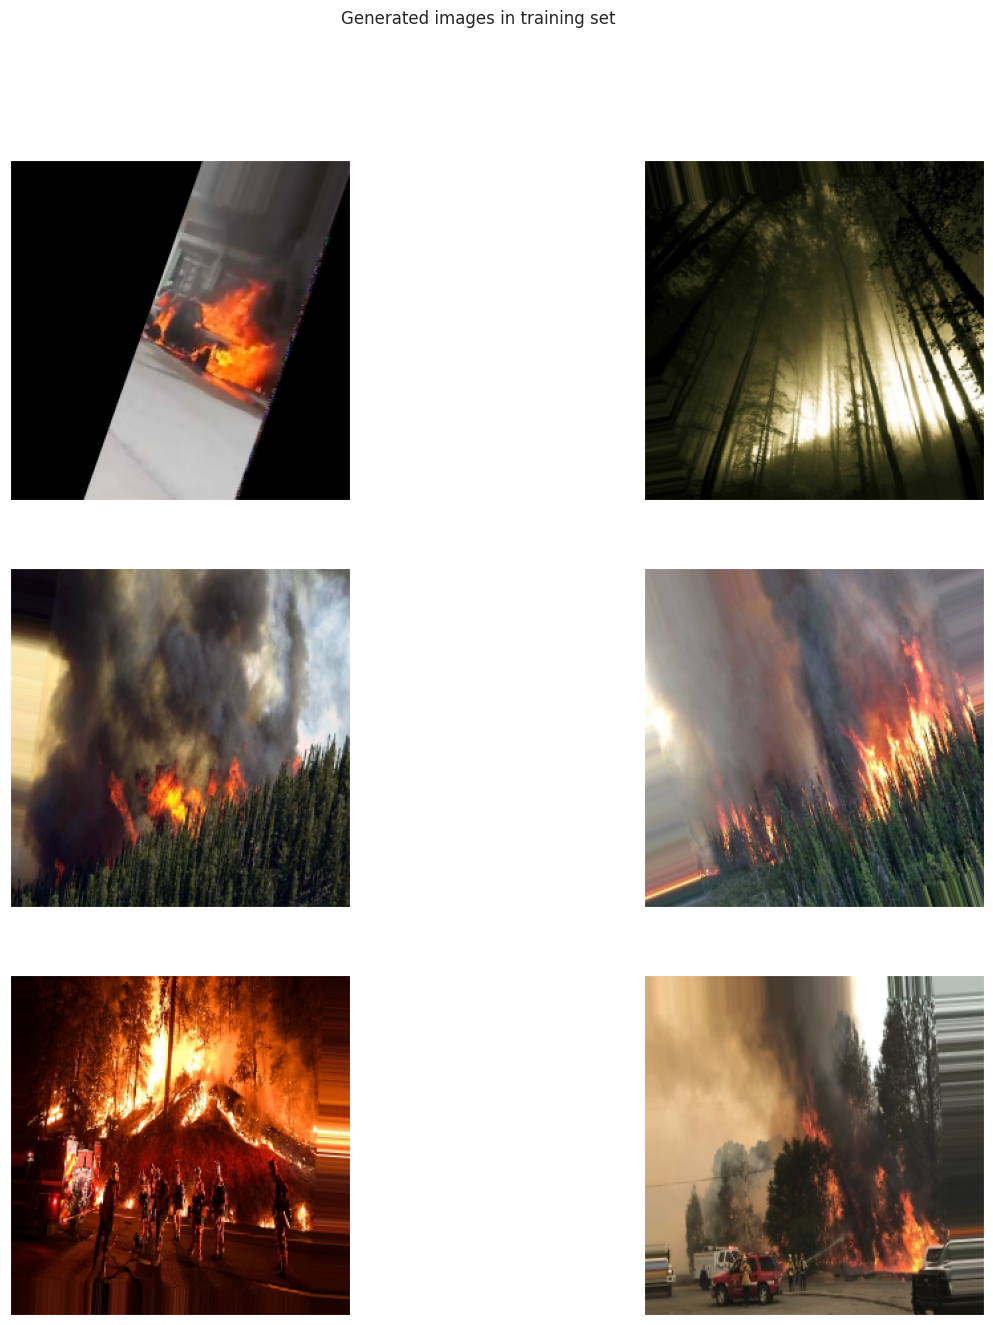

In [22]:
sns.set_style('dark')
pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Generated images in training set')
ax = ax.ravel()
for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

As we can see, all above images are in uniform shape after reshaping by ImageDataGenerator

**Building Sequential Convolutional Neural Network Model**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [24]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size = (2,2),activation='relu',input_shape = (256,256,3)))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(filters=128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In the initial layers, where the input contains a significant amount of noise, the focus is on isolating essential information. However, as we move through the subsequent layers, the intricacy of feature maps rises. To effectively capture these nuanced details, a larger number of filters is employed.

**Model Summary**

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 128)       0

Now, Compile the Model



In [26]:
from tensorflow.keras.metrics import Recall,AUC
from tensorflow.keras.utils import plot_model

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

Let's define callbacks

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [29]:
early_stoppping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)
reduce_lr_on_plateau = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5)

**Model Fitting**

In [30]:
model.fit(x=train_gen,batch_size=32,epochs=15,validation_data=val_gen,callbacks=[early_stoppping,reduce_lr_on_plateau])

Epoch 1/15
25/25 [==============================] - 137s 5s/step - loss: 0.6081 - accuracy: 0.7487 - recall: 0.0099 - auc: 0.7446 - val_loss: 0.2794 - val_accuracy: 0.7889 - val_recall: 0.0000e+00 - val_auc: 0.9529 - lr: 0.0010
Epoch 2/15
25/25 [==============================] - 128s 5s/step - loss: 0.2634 - accuracy: 0.9062 - recall: 0.6386 - auc: 0.9761 - val_loss: 0.1559 - val_accuracy: 0.9698 - val_recall: 0.8810 - val_auc: 0.9931 - lr: 0.0010
Epoch 3/15
25/25 [==============================] - 127s 5s/step - loss: 0.1700 - accuracy: 0.9375 - recall: 0.8663 - auc: 0.9765 - val_loss: 0.1751 - val_accuracy: 0.9347 - val_recall: 0.6905 - val_auc: 0.9790 - lr: 0.0010
Epoch 4/15
25/25 [==============================] - 120s 5s/step - loss: 0.1515 - accuracy: 0.9400 - recall: 0.8911 - auc: 0.9802 - val_loss: 0.1766 - val_accuracy: 0.9246 - val_recall: 0.6429 - val_auc: 0.9816 - lr: 0.0010
Epoch 5/15
25/25 [==============================] - 128s 5s/step - loss: 0.1116 - accuracy: 0.9588 -

Only 15 Epoch are done due to hardware limitations and time constraint

**Model Evaluation**

Plotting Evaluation Metrics

In [31]:
history= model.history.history
px.line(history,title = "Metrics Plot")

In [32]:
eval_list = model.evaluate(val_gen,return_dict=True)
for metric in eval_list.keys():
    print(metric+f": {eval_list[metric]:.2f}")

7/7 [==============================] - 14s 2s/step - loss: 0.0836 - accuracy: 0.9799 - recall: 0.9762 - auc: 0.9939
loss: 0.08
accuracy: 0.98
recall: 0.98
auc: 0.99
